## The Little Prince (어린왕자)
------------------------------------------

### 1. 어린왕자 단어 등장 횟수 세기: dict, sorted

In [ ]:
import operator
import re

fhand = open('thelittleprince.txt')
counts = dict()
for line in fhand:
    line = line.lower()
    line = re.sub(r'[^a-z]+', ' ', line)
    
    words = line.split()
    for word in words:
        if word not in counts:
            counts[word] = 1
        else:
            counts[word] += 1
    
sorted_counts = sorted(counts.items(), 
                       key=operator.itemgetter(1), 
                       reverse = True) 

In [4]:
# counts: {단어 : 빈도수, ..}
print(type(counts)) # counts의 data type은 "dict" (dictionary)
print(len(counts), '\n') # (중복없이) 총 단어수는 1989개
print(counts)

<class 'dict'>
1989 

{'chapter': 27, 'one': 106, 'once': 17, 'when': 53, 'i': 509, 'was': 161, 'six': 16, 'saw': 13, 'a': 398, 'magnificent': 3, 'picture': 4, 'in': 130, 'book': 5, 'about': 32, 'the': 829, 'jungle': 2, 'called': 1, 'true': 9, 'stories': 2, 'it': 226, 'showed': 4, 'boa': 12, 'constrictor': 6, 'swallowing': 1, 'wild': 2, 'beast': 1, 'here': 31, 'is': 108, 'copy': 1, 'of': 278, 'said': 158, 'constrictors': 4, 'swallow': 2, 'their': 12, 'prey': 1, 'whole': 9, 'without': 12, 'chewing': 1, 'afterward': 1, 'they': 91, 'are': 82, 'no': 65, 'longer': 8, 'able': 5, 'to': 366, 'move': 4, 'and': 339, 'sleep': 8, 'for': 132, 'months': 1, 'need': 10, 'digestion': 1, 'those': 19, 'days': 11, 'thought': 11, 'lot': 3, 'adventures': 1, 'eventually': 2, 'managed': 4, 'make': 23, 'my': 143, 'first': 21, 'drawing': 19, 'with': 58, 'colored': 3, 'pencil': 3, 'number': 8, 'looked': 12, 'like': 58, 'this': 66, 'grown': 26, 'ups': 20, 'masterpiece': 1, 'asked': 32, 'them': 57, 'if': 75, 'scar

In [3]:
# sorted_counts: [(단어,빈도수), ..] ; dict의 value를 중심으로 내림차순 정렬! 
print(type(sorted_counts)) # sorted_counts의 date type은 "list"
print(sorted_counts[:50])

<class 'list'>
[('the', 829), ('i', 509), ('a', 398), ('to', 366), ('and', 339), ('you', 315), ('of', 278), ('he', 275), ('little', 232), ('it', 226), ('that', 195), ('s', 187), ('prince', 180), ('was', 161), ('said', 158), ('my', 143), ('but', 140), ('for', 132), ('t', 132), ('in', 130), ('me', 115), ('is', 108), ('one', 106), ('on', 105), ('be', 102), ('his', 97), ('they', 91), ('have', 90), ('at', 85), ('all', 85), ('what', 84), ('are', 82), ('if', 75), ('so', 74), ('as', 71), ('then', 69), ('had', 69), ('ll', 68), ('this', 66), ('planet', 66), ('no', 65), ('him', 64), ('very', 61), ('not', 60), ('with', 58), ('like', 58), ('them', 57), ('m', 57), ('there', 56), ('when', 53)]


--------------------------------------------------------
### 2. 어린왕자 시각화: Word Cloud

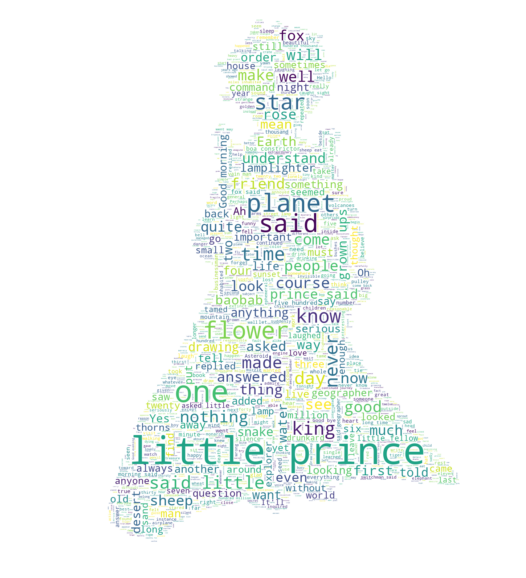

In [5]:
from os import path
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
#pip install Pillow
#reference: http://pythonstudy.xyz/python/article/406-%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%9D%B4%EB%AF%B8%EC%A7%80-%EC%B2%98%EB%A6%AC
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html

text = open(path.join('thelittleprince.txt')).read()
alice_coloring = np.array(Image.open(path.join("prince.jpg"))) # image to array
stopwords = set(STOPWORDS)
stopwords.add("chapter")
wc = WordCloud(background_color="white", max_words=2000, mask=alice_coloring,
               stopwords=stopwords, max_font_size=350, random_state=500)
wc.generate(text)

#Create coloring from image
image_colors = ImageColorGenerator(alice_coloring)

#Show
plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig('wordcloud.png', dpi=100)
plt.show()

--------------------------------------------------------
### 3. 단어 뜻 크롤링: request, BeautifulSoup

<img src='./img/request.png' width="350" height="350">

In [11]:
import requests
from bs4 import BeautifulSoup 

def f_word(find_word) :
    #크롤링(crawling)
    url = requests.get('https://endic.naver.com/search.nhn?sLn=kr&isOnlyViewEE=N&query=' + find_word)
    url.raise_for_status()
    url.encoding = 'utf-8'
    html = url.text
    #파싱(parsing)
    soup = BeautifulSoup(html,'lxml') 
    word = soup.find_all('span', attrs={'class':'fnt_k05'})
    return word

res = f_word('flower')
#print(res[:10])
print(res[2])
print(res[2].text)

<span class="fnt_k05">화단</span>
화단


### 3.1. Pandas로 간단한 단어장 만들기: DataFrame

<img src='./img/pandas.png' width="500" height="500">

In [9]:
import pandas as pd

result = []
for word, freq in sorted_counts[:100]:
    if len(word) > 4: 
        # 단어 총 길이가 5 이상인 단어만 추가
        # e.g. 'a', 'the'는 추가 X
        meaning = f_word(word)[0].text
        # 단어의 첫 번째 뜻만 추가
        if len(meaning) > 0:
            res = (word, meaning)
            result.append(res)
#print(result)
        
labels = ['단어', '뜻']
pd.DataFrame.from_records(result, columns=labels)

,단어,뜻
0,little,"(크기규모가) 작은, 소규모의"
1,prince,왕자
2,planet,행성
3,flower,꽃
4,never,결코[절대/한 번도] … 않다
5,stars,"별, 항성"
6,sheep,양
7,where,"어디에, 어디로, 어디에서"
8,again,"한 번 더, 다시"
9,about,"약, –쯤, –경"


reference
- http://pbpython.com/pandas-list-dict.html
- https://www.slideshare.net/SongSukree/2018-pyconkr-dive-into-2020-110359617